In [1]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

In [2]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model =InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None) # Your Code Here

pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  # Your Code Here
  layer.trainable = False
  
# Print the model summary
#pre_trained_model.summary()

# Expected Output is extremely large, but should end with:

#batch_normalization_v1_281 (Bat (None, 3, 3, 192)    576         conv2d_281[0][0]                 
#__________________________________________________________________________________________________
#activation_273 (Activation)     (None, 3, 3, 320)    0           batch_normalization_v1_273[0][0] 
#__________________________________________________________________________________________________
#mixed9_1 (Concatenate)          (None, 3, 3, 768)    0           activation_275[0][0]             
#                                                                 activation_276[0][0]             
#__________________________________________________________________________________________________
#concatenate_5 (Concatenate)     (None, 3, 3, 768)    0           activation_279[0][0]             
#                                                                 activation_280[0][0]             
#__________________________________________________________________________________________________
#activation_281 (Activation)     (None, 3, 3, 192)    0           batch_normalization_v1_281[0][0] 
#__________________________________________________________________________________________________
#mixed10 (Concatenate)           (None, 3, 3, 2048)   0           activation_273[0][0]             
#                                                                 mixed9_1[0][0]                   
#                                                                 concatenate_5[0][0]              
#                                                                 activation_281[0][0]             
#==================================================================================================
#Total params: 21,802,784
#Trainable params: 0
#Non-trainable params: 21,802,784

--2020-02-03 08:39:21--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  44.8MB/s    in 1.9s    

2020-02-03 08:39:23 (44.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
last_layer = pre_trained_model.get_layer('mixed7')# Your Code Here
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output# Your Code Here

# Expected Output:
# ('last layer output shape: ', (None, 7, 7, 768))

last layer output shape:  (None, 7, 7, 768)


In [0]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

      

In [5]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2) (x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

#model.summary()

# Expected output will be large. Last few lines should be:

# mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_248[0][0]             
#                                                                  activation_251[0][0]             
#                                                                  activation_256[0][0]             
#                                                                  activation_257[0][0]             
# __________________________________________________________________________________________________
# flatten_4 (Flatten)             (None, 37632)        0           mixed7[0][0]                     
# __________________________________________________________________________________________________
# dense_8 (Dense)                 (None, 1024)         38536192    flatten_4[0][0]                  
# __________________________________________________________________________________________________
# dropout_4 (Dropout)             (None, 1024)         0           dense_8[0][0]                    
# __________________________________________________________________________________________________
# dense_9 (Dense)                 (None, 1)            1025        dropout_4[0][0]                  
# ==================================================================================================
# Total params: 47,512,481
# Trainable params: 38,537,217
# Non-trainable params: 8,975,264


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# Get the Horse or Human dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip -O /tmp/horse-or-human.zip

# Get the Horse or Human Validation dataset
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip -O /tmp/validation-horse-or-human.zip 
  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = '//tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

--2020-02-03 08:39:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   176MB/s    in 0.8s    

2020-02-03 08:39:43 (176 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2020-02-03 08:39:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

In [8]:
base_dir='/tmp/horse-or-human'
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'
train_horses_dir =os.path.join(train_dir,'horses') # Your Code Here
train_humans_dir = os.path.join(train_dir,'humans')# Your Code Here
validation_horses_dir =os.path.join(validation_dir,'horses') # Your Code Here
validation_humans_dir =os.path.join(validation_dir,'humans') # Your Code Here

train_horses_fnames =os.listdir(train_horses_dir) # Your Code Here
train_humans_fnames =os.listdir(train_humans_dir) # Your Code Here
validation_horses_fnames =os.listdir(validation_horses_dir) # Your Code Here
validation_humans_fnames =os.listdir(validation_humans_dir) # Your Code Here

print(train_horses_fnames)# Your Code Here)
print(train_humans_fnames)# Your Code Here)
print(validation_horses_fnames)# Your Code Here)
print(validation_humans_fnames)# Your Code Here)

# Expected Output:
# 500
# 527
# 128
# 128

['horse41-1.png', 'horse01-3.png', 'horse23-7.png', 'horse43-9.png', 'horse28-5.png', 'horse21-1.png', 'horse25-6.png', 'horse21-3.png', 'horse17-8.png', 'horse11-3.png', 'horse33-4.png', 'horse50-2.png', 'horse24-8.png', 'horse07-4.png', 'horse28-6.png', 'horse20-3.png', 'horse22-1.png', 'horse34-8.png', 'horse32-1.png', 'horse48-6.png', 'horse33-0.png', 'horse30-6.png', 'horse50-5.png', 'horse33-3.png', 'horse29-7.png', 'horse47-3.png', 'horse33-9.png', 'horse10-0.png', 'horse05-7.png', 'horse30-9.png', 'horse07-7.png', 'horse23-4.png', 'horse46-9.png', 'horse04-5.png', 'horse41-9.png', 'horse46-4.png', 'horse32-0.png', 'horse34-7.png', 'horse25-3.png', 'horse12-2.png', 'horse37-2.png', 'horse46-6.png', 'horse43-3.png', 'horse17-5.png', 'horse08-1.png', 'horse15-1.png', 'horse02-7.png', 'horse36-0.png', 'horse16-8.png', 'horse49-3.png', 'horse37-7.png', 'horse13-1.png', 'horse32-7.png', 'horse15-9.png', 'horse18-9.png', 'horse38-3.png', 'horse27-7.png', 'horse37-0.png', 'horse04-4.pn

In [9]:
# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)# Your Code Here)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.) # Your Code Here )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))# Your Code Here)     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150)) # Your Code Here)

# Expected Output:
# Found 1027 images belonging to 2 classes.
# Found 256 images belonging to 2 classes.

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take less than 100 epochs)

callbacks =myCallback() # Your Code Here
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

Epoch 1/20
Epoch 1/20
100/100 - 33s - loss: 0.1873 - acc: 0.9291 - val_loss: 0.2390 - val_acc: 0.9676
Epoch 2/20
Epoch 1/20
100/100 - 24s - loss: 0.0870 - acc: 0.9747 - val_loss: 0.0090 - val_acc: 0.9970
Epoch 3/20
Epoch 1/20
100/100 - 24s - loss: 0.0269 - acc: 0.9909 - val_loss: 0.0017 - val_acc: 1.0000
Epoch 4/20
Epoch 1/20
100/100 - 23s - loss: 0.0433 - acc: 0.9868 - val_loss: 0.1352 - val_acc: 0.9767
Epoch 5/20
Epoch 1/20
100/100 - 22s - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0670 - val_acc: 0.9879
Epoch 6/20
Epoch 1/20
100/100 - 23s - loss: 0.0152 - acc: 0.9939 - val_loss: 0.0250 - val_acc: 0.9960
Epoch 7/20
Epoch 1/20
100/100 - 23s - loss: 0.0415 - acc: 0.9909 - val_loss: 0.1434 - val_acc: 0.9798
Epoch 8/20
Epoch 1/20
100/100 - 23s - loss: 0.0186 - acc: 0.9934 - val_loss: 0.0561 - val_acc: 0.9960
Epoch 9/20
Epoch 1/20
100/100 - 24s - loss: 0.0231 - acc: 0.9929 - val_loss: 0.2016 - val_acc: 0.9686
Epoch 10/20
Epoch 1/20
100/100 - 24s - loss: 0.0319 - acc: 0.9898 - val_loss: 0.30

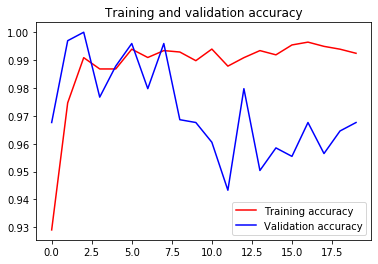

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()